In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("df_fusionne_clean.csv", index_col=0)
display(df.head())


,imageid,prdtypecode,merged,category_name
productid,,,,
436067568,1.008141e+09,2280.0,journal art lart marche salon dart asiatique a...,Journaux et revues occasions
201115110,9.387780e+08,50.0,grand stylet ergonomique bleu gamepad nintendo...,Accessoires gaming
50418756,4.570475e+08,1280.0,peluche donald europe disneyland marionnette d...,Jouets enfant
278535884,1.077758e+09,2705.0,guerre tuques luc a ideacutees grandeur veut o...,Livres neufs
5862738,3.933568e+08,2280.0,afrique contemporaine hiver dossier japon afrique,Journaux et revues occasions


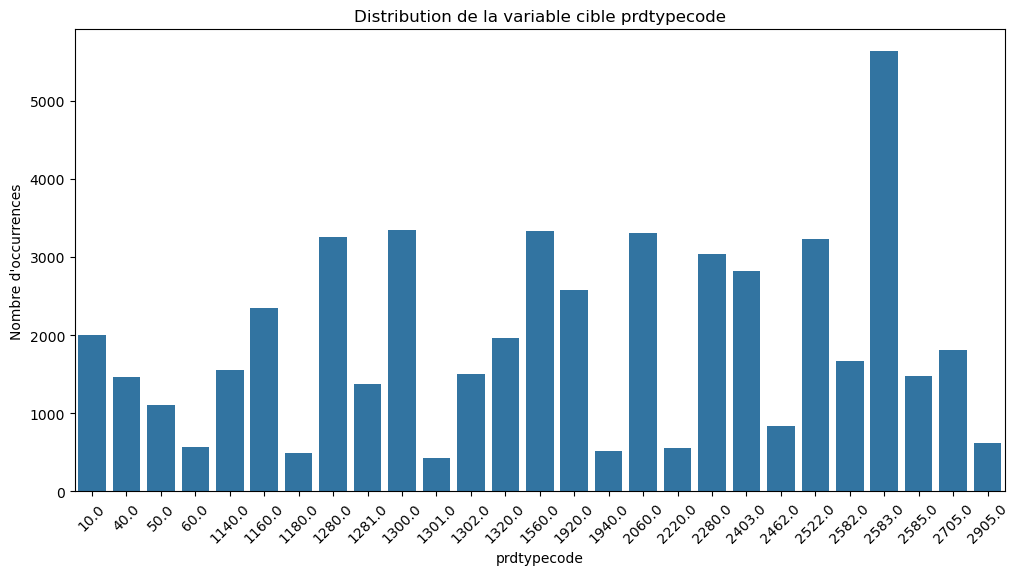

Minimum    Variable : 1301.0    Occurence : 429
Maximum    Variable : 2583.0    Occurence : 5630


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# REPARTITION DE LA VARIABLE CIBLE

# Occurrences de chaque catégorie
count_values = df["prdtypecode"].value_counts()

# Graphique 
plt.figure(figsize=(12,6))
sns.barplot(x=count_values.index, y=count_values.values)
plt.xlabel("prdtypecode")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de la variable cible prdtypecode")
plt.xticks(rotation=45)
plt.show()

# Occurance min et max
print("Minimum    Variable :", count_values.idxmin(), "   Occurence :", count_values.min())
print("Maximum    Variable :", count_values.idxmax(), "   Occurence :", count_values.max())

Au vu de la distribution de la variable cible, nous choisissons d'équilibrer avec un nombre d'occurence cible de 3200

In [4]:
# VECTORISATION du texte avec Term Frequency - Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(df["merged"])



# EQUILIBRAGE avec SMOTE et un nombre d'occurrences cible de 3200
from imblearn.over_sampling import SMOTE

# Classe à rééchantillonner jusqu'à 3200
target_count = 3200
current_counts = df["prdtypecode"].value_counts()
classes_to_oversample = current_counts[current_counts < target_count].index

# Dictionnaire pour sampling_strategy
sampling_strategy = {cls: target_count for cls in classes_to_oversample}

# Appliquation de SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=25)
X_resampled, y_resampled = smote.fit_resample(X_vect, df["prdtypecode"])


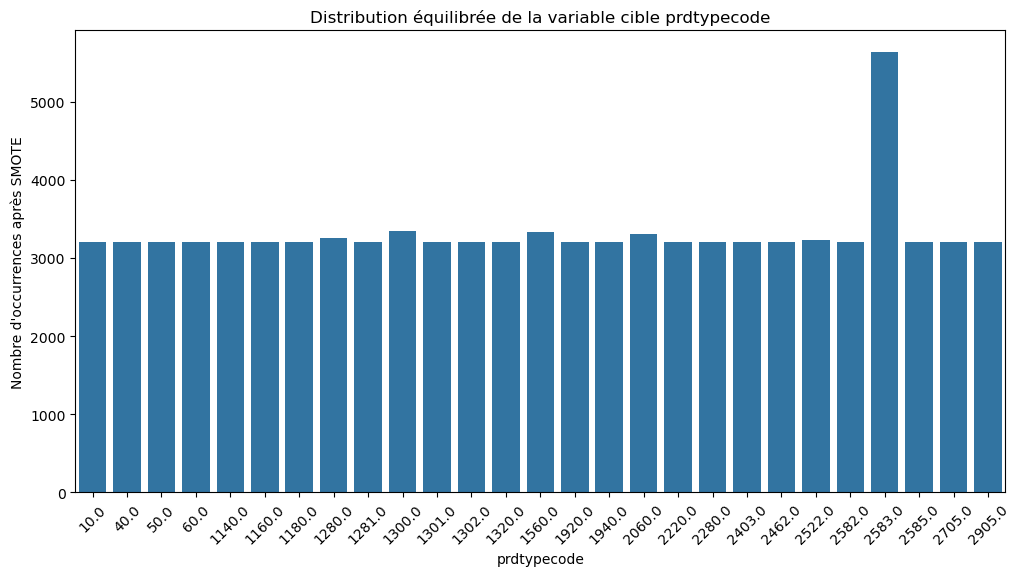

Minimum    Variable : 1940.0    Occurence : 3200
Maximum    Variable : 2583.0    Occurence : 5630


In [5]:
# REPARTITION DE LA VARIABLE CIBLE APRES EQUILIBRAGE AVEC SMOTE
y_resampled_series = pd.Series(y_resampled)
count_values_resampled = y_resampled_series.value_counts()

# Graphique
plt.figure(figsize=(12,6))
sns.barplot(x=count_values_resampled.index, y=count_values_resampled.values)
plt.xlabel("prdtypecode")
plt.ylabel("Nombre d'occurrences après SMOTE")
plt.title("Distribution équilibrée de la variable cible prdtypecode")
plt.xticks(rotation=45)
plt.show()

# Occurance min et max
print("Minimum    Variable :", count_values_resampled.idxmin(), "   Occurence :", count_values_resampled.min())
print("Maximum    Variable :", count_values_resampled.idxmax(), "   Occurence :", count_values_resampled.max())


Toutes les classes minoritaires ont maintenant bien 3200 occurences.
Nous allons maintenant réduire les classes majoritaires.

In [6]:
from imblearn.under_sampling import RandomUnderSampler

# Récupération des différentes classes présentes
unique_classes = np.unique(y_resampled)

# Construction du dictionnaire cible : chaque classe ramenée à 4000
undersample_strategy = {cls: 3200 for cls in unique_classes}

# Appliquation du RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=25)
X_final, y_final = under_sampler.fit_resample(X_resampled, y_resampled)

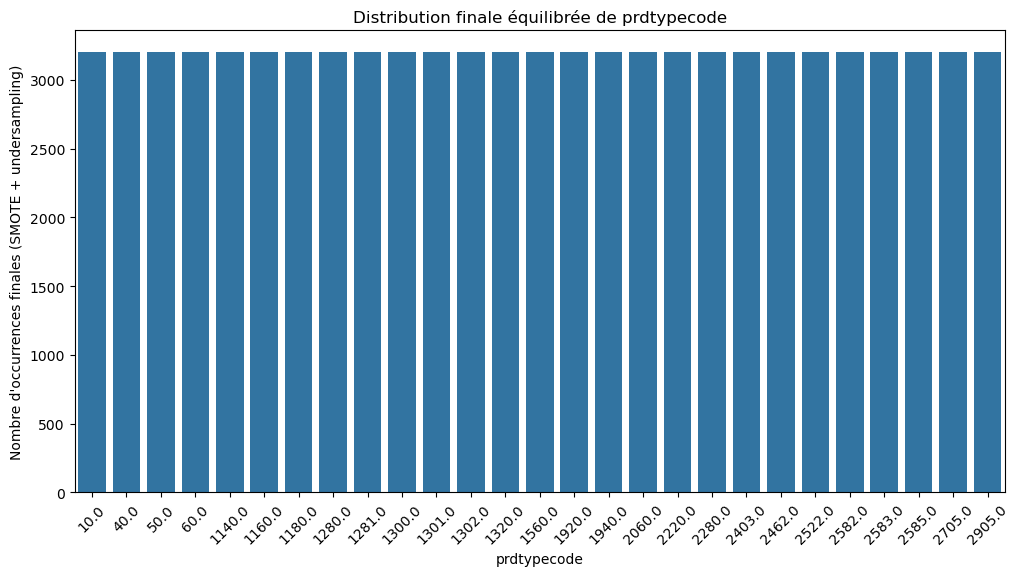

Minimum    Variable : 10.0    Occurrence : 3200
Maximum    Variable : 10.0    Occurrence : 3200


In [7]:
# REPARTITION DE LA VARIABLE CIBLE APRES SMOTE + UNDERSAMPLING
y_final_series = pd.Series(y_final)
count_values_final = y_final_series.value_counts()

# Graphique
plt.figure(figsize=(12,6))
sns.barplot(x=count_values_final.index, y=count_values_final.values)
plt.xlabel("prdtypecode")
plt.ylabel("Nombre d'occurrences finales (SMOTE + undersampling)")
plt.title("Distribution finale équilibrée de prdtypecode")
plt.xticks(rotation=45)
plt.show()

# Occurrence min et max
print("Minimum    Variable :", count_values_final.idxmin(), "   Occurrence :", count_values_final.min())
print("Maximum    Variable :", count_values_final.idxmax(), "   Occurrence :", count_values_final.max())

In [8]:
# SAUVEGARDE des matrices matrice TF-IDF et du vectorizer

import joblib

# Sauvegarde des données
joblib.dump(X_final, "X_final_tfidf.pkl")
joblib.dump(y_final, "y_final.pkl")

# Sauvegarde du vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']